# Protein Abundance and Phosphorylation Analysis

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

alt.renderers.enable('notebook')
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [2]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

# Protein Abundance

In [3]:
gene = 'PIK3CA'
protList = ['AKT1']

pcutoff = 0.05/len(protList)
print(pcutoff)

genedf = somatic_mutations[gene].to_frame()
for protein in protList:
    if protein in proteomics.columns:
        proteindf = proteomics[protein].to_frame()
        proteinfindName = protein + "protein"
        proteindf.columns = [proteinfindName]
        cross = genedf.add(proteindf, fill_value=0).dropna(axis=0)
        mutated = cross.loc[cross[gene] == 1.0]
        wt = cross.loc[cross[gene] == 0.0]
        ttest = scipy.stats.ttest_ind(mutated[proteinfindName], wt[proteinfindName])
        print("Test for " + protein + ": ")
        print(ttest)

0.05
Test for AKT1: 
Ttest_indResult(statistic=-0.8003450633178396, pvalue=0.4254468321094339)


[Text(0, 0.5, 'Proteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

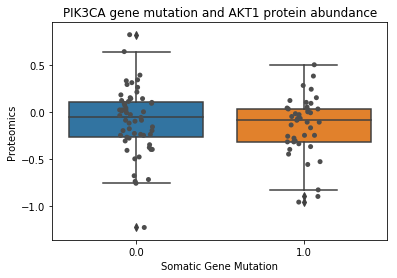

In [4]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=proteinfindName)
somatic_boxplot.set_title(gene + " gene mutation and " + protList[0] + " protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=proteinfindName,jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")

Note: protein abundance of AKT1 when PIK3CA mutated not significantly different than non-mutated PIK3CA

# Phosphorylation 

In [10]:
phosProt = phos.filter(regex='AKT1')
gene = 'PIK3CA'

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(phosProt, fill_value = 0)
sigResults = []
#print(cross.head())

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

mutated = cross.loc[cross[gene] == 1.0]
#print(mutated.head())
wt = cross.loc[cross[gene] == 0.0]
#print(wt.head())

for loc in cross.columns:
    if not loc == gene:
        oneSitedf_m = mutated[[gene, loc]].dropna()
        oneSitedf_wt = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(oneSitedf_m[loc], oneSitedf_wt[loc])
        sigResults.append(loc)
        print("Results for " + loc)
        print(ttest)

0.0038461538461538464
Results for AKT1-S124
Ttest_indResult(statistic=0.6280425387291785, pvalue=0.531640346649029)
Results for AKT1-S126
Ttest_indResult(statistic=-0.4020064075926627, pvalue=0.6886117295962362)
Results for AKT1-S129
Ttest_indResult(statistic=-0.2234741976843904, pvalue=0.823661935424068)
Results for AKT1S1-S108
Ttest_indResult(statistic=0.6077698447464415, pvalue=0.5448214268347861)
Results for AKT1S1-S112
Ttest_indResult(statistic=0.7954185284994514, pvalue=0.42839555932400375)
Results for AKT1S1-S203
Ttest_indResult(statistic=0.010600747915174496, pvalue=0.9915765794177508)
Results for AKT1S1-S222
Ttest_indResult(statistic=1.4145532745878184, pvalue=0.1603689302651402)
Results for AKT1S1-S223
Ttest_indResult(statistic=0.8122994826348905, pvalue=0.4185886232556425)
Results for AKT1S1-S231
Ttest_indResult(statistic=0.18718518910376322, pvalue=0.8519232020592304)
Results for AKT1S1-S232
Ttest_indResult(statistic=0.6588293281774983, pvalue=0.5116332761545239)
Results fo

[Text(0, 0.5, 'Phosphoproteomics'), Text(0.5, 0, 'Somatic Gene Mutation')]

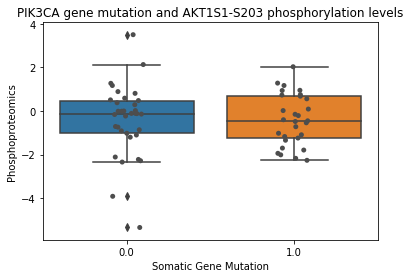

In [11]:
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=sigResults[5])
somatic_boxplot.set_title(gene + " gene mutation and " + sigResults[5] + " phosphorylation levels")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=sigResults[5],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")

Checking the phosphorylation level of any form of AKT

In [12]:
phosProt = phos.filter(regex='AKT')
gene = 'PIK3CA'

genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(phosProt, fill_value = 0)
sigResults = []
#print(cross.head())

pcutoff = 0.05/len(cross.columns)
print(pcutoff)

mutated = cross.loc[cross[gene] == 1.0]
#print(mutated.head())
wt = cross.loc[cross[gene] == 0.0]
#print(wt.head())

for loc in cross.columns:
    if not loc == gene:
        oneSitedf_m = mutated[[gene, loc]].dropna()
        oneSitedf_wt = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(oneSitedf_m[loc], oneSitedf_wt[loc])
        sigResults.append(loc)
        print("Results for " + loc)
        print(ttest)

0.0033333333333333335
Results for AKT1-S124
Ttest_indResult(statistic=0.6280425387291785, pvalue=0.531640346649029)
Results for AKT1-S126
Ttest_indResult(statistic=-0.4020064075926627, pvalue=0.6886117295962362)
Results for AKT1-S129
Ttest_indResult(statistic=-0.2234741976843904, pvalue=0.823661935424068)
Results for AKT1S1-S108
Ttest_indResult(statistic=0.6077698447464415, pvalue=0.5448214268347861)
Results for AKT1S1-S112
Ttest_indResult(statistic=0.7954185284994514, pvalue=0.42839555932400375)
Results for AKT1S1-S203
Ttest_indResult(statistic=0.010600747915174496, pvalue=0.9915765794177508)
Results for AKT1S1-S222
Ttest_indResult(statistic=1.4145532745878184, pvalue=0.1603689302651402)
Results for AKT1S1-S223
Ttest_indResult(statistic=0.8122994826348905, pvalue=0.4185886232556425)
Results for AKT1S1-S231
Ttest_indResult(statistic=0.18718518910376322, pvalue=0.8519232020592304)
Results for AKT1S1-S232
Ttest_indResult(statistic=0.6588293281774983, pvalue=0.5116332761545239)
Results fo